In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

# 1. Load data

In [2]:
annotations = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/12_concatenated/annotations.tsv", sep="\t", index_col=[0,1,2,3])

insertions = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/16_insertion_level_curve_fitting/insertions_LFC_fitted.tsv", sep="\t", index_col=[0,1,2,3])

# 2.Plus vs Minus

In [3]:
plus_minus_pairs = insertions.unstack(level="Strand").dropna()

# 3. Scatter plot

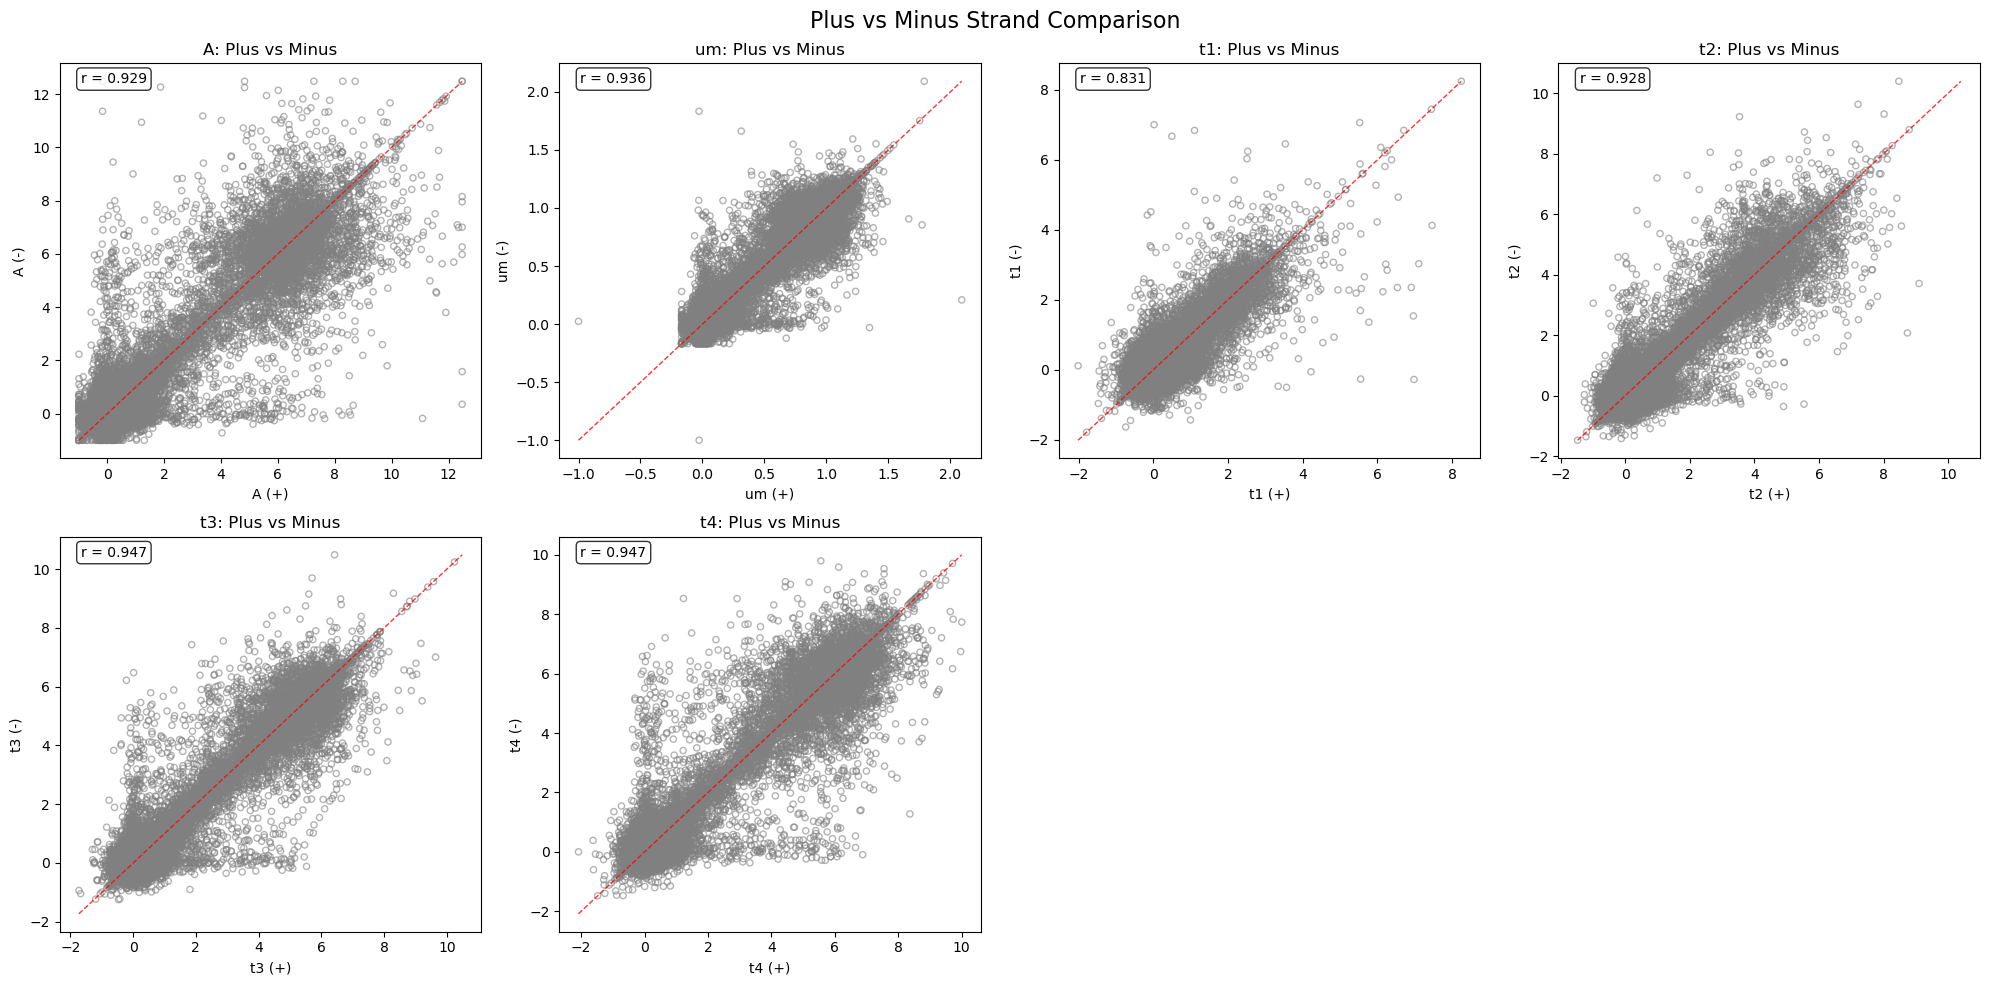

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for A, um, and t1-t4 parameters
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Plus vs Minus Strand Comparison', fontsize=16)

# Parameters to plot
params = ['A', 'um', 't1', 't2', 't3', 't4']

# Plot each parameter
for i, param in enumerate(params):
    if i < 4:
        ax = axes[0, i]
    else:
        ax = axes[1, i-4]
    
    # Extract plus and minus values for the parameter
    plus_vals = plus_minus_pairs[(param, '+')]
    minus_vals = plus_minus_pairs[(param, '-')]
    
    # Create scatter plot
    ax.scatter(plus_vals, minus_vals, alpha=0.6, s=20, facecolor="none", edgecolor="grey")
    
    # Add diagonal line (y=x)
    min_val = min(plus_vals.min(), minus_vals.min())
    max_val = max(plus_vals.max(), minus_vals.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=1)
    
    # Set labels and title
    ax.set_xlabel(f'{param} (+)')
    ax.set_ylabel(f'{param} (-)')
    ax.set_title(f'{param}: Plus vs Minus')
    
    # Add correlation coefficient
    corr = np.corrcoef(plus_vals, minus_vals)[0, 1]
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove empty subplots
for i in range(len(params), 8):
    if i < 4:
        fig.delaxes(axes[0, i])
    else:
        fig.delaxes(axes[1, i-4])

plt.tight_layout()
plt.show()
plt.close()

# 4.Plus severe than minus

In [4]:
sites = plus_minus_pairs.sort_index().index.tolist()

In [5]:
plus_severe_than_minus = plus_minus_pairs[(plus_minus_pairs[("A", "+")] - plus_minus_pairs[("A", "-")]) > 3]
minus_severe_than_plus = plus_minus_pairs[(plus_minus_pairs[("A", "-")] - plus_minus_pairs[("A", "+")]) > 3]

In [6]:
def find_indices(arr, values):
    """
    Returns the indices of elements in `arr` that match any value in `values`.
    
    Parameters:
    arr (ndarray): Input array.
    values (array-like): Values to search for in `arr`.
    
    Returns:
    tuple of ndarrays: Indices where `arr` matches any value in `values`.
    """
    mask = np.isin(arr, values)  # True where arr[i] is in values
    indices = np.nonzero(mask)   # Get indices of True values
    return indices


In [62]:
plus_severe_than_minus_sites = plus_severe_than_minus.index.tolist()
minus_severe_than_plus_sites = minus_severe_than_plus.index.tolist()

formated_sites = ["_".join(map(str, s)) for s in sites]
formated_plus_severe_than_minus = ["_".join(map(str, s)) for s in plus_severe_than_minus_sites]
formated_minus_severe_than_plus = ["_".join(map(str, s)) for s in minus_severe_than_plus_sites]

idx_plus_severe_than_minus = find_indices(formated_sites, formated_plus_severe_than_minus)
idx_minus_severe_than_plus = find_indices(formated_sites, formated_minus_severe_than_plus)


In [64]:
adjacent_site_idx_are_plus_severe_than_minus = []

for idx in idx_plus_severe_than_minus[0]:
    previous = max(0, idx - 1)
    next = min(len(sites) - 1, idx + 1)
    if (previous in idx_plus_severe_than_minus[0]) or (next in idx_plus_severe_than_minus[0]):
        adjacent_site_idx_are_plus_severe_than_minus.append(idx)

adjacent_site_idx_are_minus_severe_than_plus = []

for idx in idx_minus_severe_than_plus[0]:
    previous = max(0, idx - 1)
    next = min(len(sites) - 1, idx + 1)
    if (previous in idx_minus_severe_than_plus[0]) or (next in idx_minus_severe_than_plus[0]):
        adjacent_site_idx_are_minus_severe_than_plus.append(idx)


In [65]:
adjacent_sites_are_plus_severe_than_minus = [sites[idx] for idx in adjacent_site_idx_are_plus_severe_than_minus if idx in idx_plus_severe_than_minus[0]]
adjacent_sites_are_minus_severe_than_plus = [sites[idx] for idx in adjacent_site_idx_are_minus_severe_than_plus if idx in idx_minus_severe_than_plus[0]]

In [66]:
plus_severe_than_minus_regions = annotations.loc[plus_severe_than_minus.loc[adjacent_sites_are_plus_severe_than_minus].stack(level="Strand").reorder_levels(["Chr", "Coordinate", "Strand", "Target"]).index]["Name"].value_counts()
minus_severe_than_plus_regions = annotations.loc[minus_severe_than_plus.loc[adjacent_sites_are_minus_severe_than_plus].stack(level="Strand").reorder_levels(["Chr", "Coordinate", "Strand", "Target"]).index]["Name"].value_counts()

/tmp/ipykernel_2206449/4206882713.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  plus_severe_than_minus_regions = annotations.loc[plus_severe_than_minus.loc[adjacent_sites_are_plus_severe_than_minus].stack(level="Strand").reorder_levels(["Chr", "Coordinate", "Strand", "Target"]).index]["Name"].value_counts()
/tmp/ipykernel_2206449/4206882713.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  minus_severe_than_plus_regions = annotations.loc[minus_severe_than_plus.loc[adjacent_sites_are_minus_severe_than_plus].stack(level="Strand").reorder_levels(["Chr", "Coordinate

In [69]:
plus_severe_than_minus_regions / 2

Name
cwf5                 4.0
cut14|SPBP4H10.07    3.0
SPAPB8E5.08|rvb1     3.0
hom2|spx2            3.0
bgs4|SPCC1840.13     3.0
cdc25                2.0
cdc12                2.0
vps51                2.0
gua2                 2.0
ppc89|pcc1           2.0
mmm1|mis19           2.0
rps102               2.0
rpf1|sdo1            2.0
dhp1|Tf2-4           2.0
cum1|sss1            2.0
pop7|rng9            2.0
pfk1|sad1            2.0
esf2                 2.0
rpr2|cnp1            2.0
dbp2|thi20           2.0
tfg2|fbp1            2.0
mas5                 2.0
nop56|cct6           2.0
etf1|smd1            1.0
smd1                 1.0
dhp1                 1.0
rps13                1.0
rax2|rps13           1.0
mis19                1.0
taf6                 1.0
taf6|vps5            1.0
Name: count, dtype: float64

In [68]:
minus_severe_than_plus_regions / 2

Name
gwt1|rps1102         3.0
pan1                 3.0
ipa1|mas5            3.0
wrs1|rrp4            2.0
rpc11|fsh2           2.0
mtl1                 2.0
rad4|spt5            2.0
rad52                2.0
mso1|cdc12           2.0
ppk25|fes1           2.0
stb3|SPBC1652.02     2.0
klp2|ssc1            2.0
gon7|SPAC6B12.04c    2.0
uso1                 2.0
snt1|hsf1            2.0
dss1|ifs1            2.0
rng2                 2.0
sap10|gfh1           2.0
mcm6|sap10           2.0
rps2201|rpc11        1.0
spt5                 1.0
rpc17                1.0
rpc17|mpa1           1.0
ker1                 1.0
hop1|ker1            1.0
Name: count, dtype: float64